Список заданий:

- Создайте полностью белое (или черное) бинарное изображение определенного размера. Выведите изображение на экран. Добавьте текстовое поле (label) со значением "Белый" или "Черный" по середине изображения.

- Создайте черно-белое бинарное изображение определенного размера со случайными значениям пикселей. Выведите изображение на экран. Ответьте на вопрос: сколько существует всевозможных бинарных изображений размера 320x240 (Tips: один пиксел может принимать два значения).

Для последующих заданий потребуется скачать пару цветных растровых изображений с Интернета (лучше всего формата JPEG или PNG). Обозначим скаченные изображения как A и B:

- Загрузите в память изображения A и B (Tips: `cv2.imread`)

-  В изображении A поменяйте местами цветовые компоненты Red на Green, Green на Blue, Blue на Red. Выведите исходное изображение A и полученное изображение A'.

- Реализуйте метод `blend(A, B, alpha)`, который на вход получает коэффициент `alpha` и два изображения A и B, а на выходе возвращает комбинацию `C = alpha * A + (1 - alpha) * B`, причем $alpha \in [0, 1]$. Поэкспериментируйте с коэффициентом `alpha` и выведите изображения A и B на экран и результат C (Tips: `cv2.addWeighted`).

- \* Сконвертируйте цветное изображение в формат grayscale (оттенки серого). Реализуйте программу квантования этого изображения, т.е. уменьшите количество оттенков серого до 16, 4 и 2 (4-bit, 2-bit, 1-bit на пиксел соответственно). Выведите изображения на экран. Задание опционально.

# Task 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

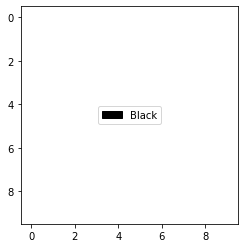

In [2]:
img = np.zeros((10, 10), dtype=int)

plt.imshow(img, cmap='binary')
patches = [mpatches.Patch(color='black', label="Black")]
plt.legend(handles=patches, loc='center')
plt.show()

# Task 2

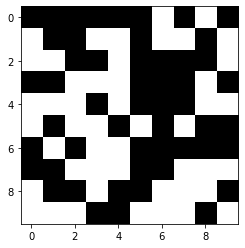

In [3]:
img = np.random.randint(0, 2, (10, 10))

plt.imshow(img, cmap='binary')
plt.show()

Сколько существует всевозможных бинарных изображений размера 320x240?

1. 320 * 240 = 76800 pixels per image
2. 1 pixel = 2 values
2. 2<sup>76800</sup> pixel values combination

# Task 3

In [4]:
!mkdir -p img
!wget "https://4pawsins.com/wp-content/uploads/2018/10/corgi_1200.jpg" -O img/doggo.jpg
!wget "https://i.pinimg.com/originals/37/b5/c8/37b5c80f7078b9a94052a51185d389a5.jpg" -O img/catto.jpg

--2020-12-28 20:55:59--  https://4pawsins.com/wp-content/uploads/2018/10/corgi_1200.jpg
Resolving 4pawsins.com (4pawsins.com)... 67.227.187.15
Connecting to 4pawsins.com (4pawsins.com)|67.227.187.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 608076 (594K) [image/jpeg]
Saving to: ‘img/doggo.jpg’

img/doggo.jpg       100%[===================>] 593.82K  2.18MB/s    in 0.3s    

2020-12-28 20:56:00 (2.18 MB/s) - ‘img/doggo.jpg’ saved [608076/608076]

--2020-12-28 20:56:00--  https://i.pinimg.com/originals/37/b5/c8/37b5c80f7078b9a94052a51185d389a5.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.188.84, 2a04:4e42:a::84
Connecting to i.pinimg.com (i.pinimg.com)|151.101.188.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59579 (58K) [image/jpeg]
Saving to: ‘img/catto.jpg’

img/catto.jpg       100%[===================>]  58.18K  --.-KB/s    in 0.02s   

2020-12-28 20:56:00 (3.01 MB/s) - ‘img/catto.jpg’ saved [59579/59579]



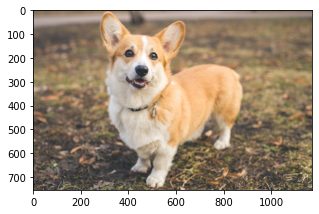

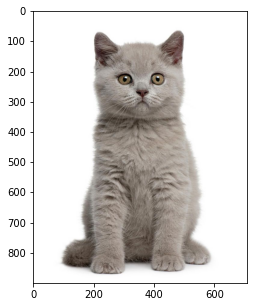

In [5]:
A = cv2.imread('img/doggo.jpg', cv2.IMREAD_COLOR)
B = cv2.imread('img/catto.jpg', cv2.IMREAD_COLOR)

A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)
B = cv2.cvtColor(B, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(A)
plt.show()
plt.figure(figsize=(5, 5))
plt.imshow(B)
plt.show()

# Task 4

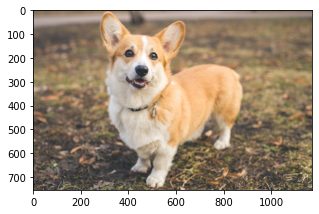

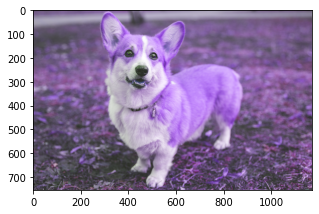

In [6]:
plt.figure(figsize=(5, 5))
plt.imshow(A)
plt.show()

a = A.copy()
a[:, :, 0] = A[:, :, 1]
a[:, :, 1] = A[:, :, 2]
a[:, :, 2] = A[:, :, 0]

plt.figure(figsize=(5, 5))
plt.imshow(a)
plt.show()

# Task 5

In [7]:
def blend(A, B, alpha):
  if 0 < alpha < 1:
    return alpha * A + (1 - alpha) * B
  else:
    return None

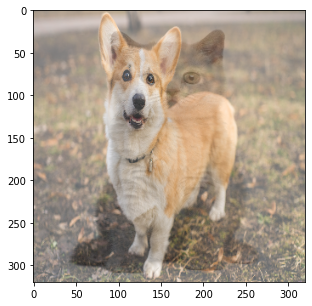

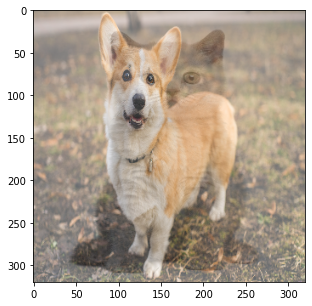

In [8]:
a = cv2.resize(A, dsize=(320, 320))
b = cv2.resize(B, dsize=(320, 320))
alpha = 0.7

weighted = cv2.addWeighted(a, alpha, b, 1 - alpha, 0)
plt.figure(figsize=(5, 5))
plt.imshow(weighted)
plt.show()

blended = blend(a, b, alpha)
plt.figure(figsize=(5, 5))
plt.imshow(blended.astype(np.uint8))
plt.show()

# Task 6

In [9]:
def quantize(img, lvl):
  return img // ((np.amax(img) - np.amin(img) + 1) // lvl)

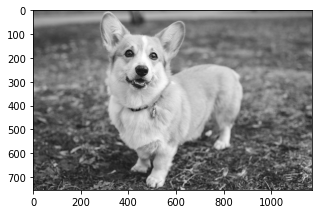

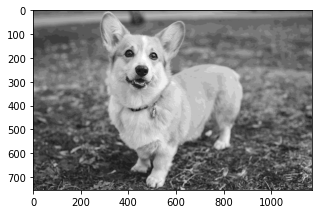

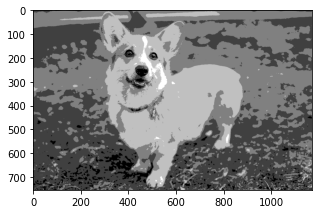

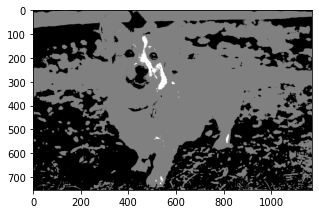

In [10]:
a = cv2.cvtColor(A, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(5, 5))
plt.imshow(a, cmap='gray')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(quantize(a, 16), cmap='gray')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(quantize(a, 4), cmap='gray')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(quantize(a, 2), cmap='gray')
plt.show()